# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [9]:
df = pd.read_csv("/content/drive/MyDrive/week2/creditcard.csv")

In [10]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


         V1        V2        V3        V4        V5        V6        V7  \
0 -1.848212  2.384900  0.379573  1.048381 -0.845070  2.537837 -4.542983   
1  2.071805 -0.477943 -1.444444 -0.548657  0.010036 -0.582242 -0.042878   
2 -2.985294 -2.747472  1.194068 -0.003036 -1.151041 -0.263559  0.553500   
3 -1.479452  1.542874  0.290895  0.838142 -0.529290 -0.717661  0.484516   
4 -0.281976 -0.309699 -2.162299 -0.851514  0.106167 -1.483888  1.930994   

          V8        V9       V10  ...       V20       V21       V22       V23  \
0 -10.201458 -1.504967 -2.234167  ...  2.585817 -5.291690  0.859364  0.423231   
1  -0.247160  1.171923 -0.342382  ... -0.077306  0.042858  0.390125  0.041569   
2   0.635600  0.438545 -1.806488  ...  1.345776  0.373760 -0.385777  1.197596   
3   0.545092 -0.780767  0.324804  ...  0.038397  0.116771  0.405560 -0.116453   
4  -0.843049 -1.249272  1.079608  ... -0.875516 -0.004199  1.015108 -0.026748   

        V24       V25       V26       V27       V28  Class  
0

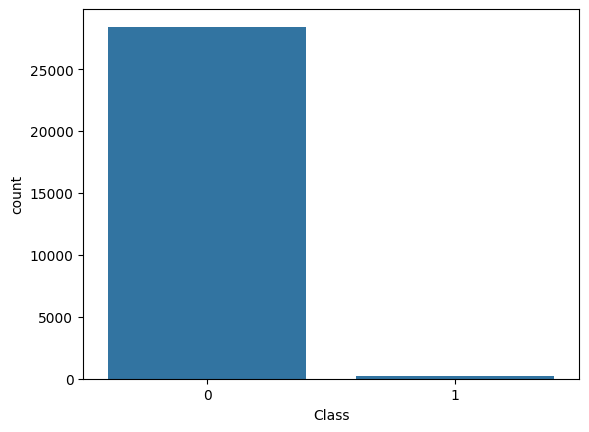

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Exploratory Data Analysis
print(df.head())
print(df.describe())
print(df.isnull().sum())

# Check class balance
print(df['Class'].value_counts(normalize=True))

# Plotting for visual analysis
sns.countplot(x='Class', data=df)
plt.show()

In [12]:
df.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
Class    0
dtype: int64

In [15]:
!pip install imbalanced-learn

In [16]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# SMOTE 적용 (클래스 0과 클래스 1 비율을 1:1로 조절)
X = df.drop('Class', axis=1)
y = df['Class']
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 결과 확인
resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame({'Class': y_resampled})], axis=1)
print(resampled_df)

             V1        V2        V3        V4        V5        V6        V7  \
0     -1.848212  2.384900  0.379573  1.048381 -0.845070  2.537837 -4.542983   
1      2.071805 -0.477943 -1.444444 -0.548657  0.010036 -0.582242 -0.042878   
2     -2.985294 -2.747472  1.194068 -0.003036 -1.151041 -0.263559  0.553500   
3     -1.479452  1.542874  0.290895  0.838142 -0.529290 -0.717661  0.484516   
4     -0.281976 -0.309699 -2.162299 -0.851514  0.106167 -1.483888  1.930994   
...         ...       ...       ...       ...       ...       ...       ...   
56859 -1.776586  0.221010 -2.406407  3.541066 -3.188894  0.574340 -0.520090   
56860  0.133306  0.995959  1.457498  2.297122  0.180491 -0.095085  0.194058   
56861 -0.137631  3.149715 -3.659863  6.006819  0.536494 -0.581925 -1.663706   
56862 -3.219916  4.543974 -8.856567  4.840973 -4.958059 -3.894401 -9.562153   
56863  0.343152  1.310683 -2.009234  2.004981 -1.424806 -1.561950 -2.268663   

              V8        V9        V10  ...       V2

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [17]:
X = resampled_df.drop('Class', axis=1)
y = resampled_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9572672118174624
Confusion Matrix:
 [[5576  136]
 [ 350 5311]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      5712
           1       0.98      0.94      0.96      5661

    accuracy                           0.96     11373
   macro avg       0.96      0.96      0.96     11373
weighted avg       0.96      0.96      0.96     11373



### Result of Confusion Matrix

True Negative(TN) : 5576 ->모델이 음성 클래스(클래스 0)를 5576회 정확하게 예측함
True Positive(TP) : 5311 -> 모델이 양성 클래스를 5311번 정확하게 예측함
False Positive(FP) : 350 -> 실제로는 클래스 0이었는데 모델이 양성 클래스(클래스 1)를 350번 잘못 예측함
False Negative(FN) : 136 -> 실제로는 양성 클래스(클래스 1)였으나 모델은 음성 클래스를 136번 잘못 예측함

오버샘플링 결과, 불균형으로 1을 제대로 예측하지 못하는 문제를 해결함